# Data Understanding

Import delle librerie necessarie: 

In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

Caricamento dei dataset: vengono letti i dati csv e caricati nei dataframe pandas

In [2]:
cyclists = pd.read_csv("../dataset/cyclists.csv", low_memory=False)
races = pd.read_csv("../dataset/races.csv", low_memory=False)

## 1) Analisi del dataset "cyclists"

Prima di tutto, vengono riportate alcune informazioni generali riguardo a questo dataset:


In [4]:
cyclists.info()
cyclists.shape

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6134 entries, 0 to 6133
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   _url         6134 non-null   object 
 1   name         6134 non-null   object 
 2   birth_year   6121 non-null   float64
 3   weight       3078 non-null   float64
 4   height       3143 non-null   float64
 5   nationality  6133 non-null   object 
dtypes: float64(3), object(3)
memory usage: 287.7+ KB


(6134, 6)

Possiamo notare come il dataset sia composto da 6134 righe e 6 colonne. Inoltre:

In [6]:
cyclists_duplicates = cyclists.duplicated().sum()
print(f"Numero di duplicati nel DataFrame cyclists: {cyclists_duplicates}")

Numero di duplicati nel DataFrame cyclists: 0


<b> Non sono presenti duplicati all'interno del dataset. </b>

### 1.1) Analisi statistica
Generiamo statistiche descrittive sugli attributi numerici relativi ai ciclisti: 

In [7]:
cyclists.describe()

,birth_year,weight,height
count,6121.000000,3078.000000,3143.000000
mean,1974.071884,68.658739,179.815145
std,15.535834,6.348183,6.443447
min,1933.000000,48.000000,154.000000
25%,1962.000000,64.000000,175.000000
50%,1974.000000,69.000000,180.000000
75%,1987.000000,73.000000,184.000000
max,2004.000000,94.000000,204.000000


Nel dettaglio: 
<ul type="disc">
    <li> 
        <b>Count: </b> fornisce il numero di valori non nulli presenti nella tabella. Confrontando i valori ottenuti possiamo facilemente notare come siano presenti valori mancanti (in particolare peso ed altezza).
    </li>
    <li>
        <b>Mean: </b>fornisce la media dei valori, rispettivamente alla colonna a cui appartengono. Da questi risultati possiamo notare che in media gli atleti sono nati intorno alla metà degli anni 70, sono alti 1.80m (circa) e pesano intorno ai 70Kg.
    </li>
    <li>
        <b>Std: </b>fornisce lo scarto quadratico medio dei valori, rispettivamente alla colonna a cui appartengono. Possiamo notare una variazione più accentuata dei dati nella data di nascita (15.5) rispetto al peso (6.34) e all'altezza (6.44).
    </li>
    <li>
        <b>Min/Max: </b>forniscono i valori minimi/massimi dei valori, rispettivamente alla colonna a cui appartengono. 
    </li>
    <li>
        <b> 25% - 50% - 75%: </b>sono i quartili.
    </li>
</ul>
In particolare, mostriamo la variazione dei dati raccolti utilizzando un istogramma.
Il numero di bins è stato calcolato utilizzando la <b> Sturges' rule</b>, ovvero: 
$$
bins = \lceil \log_2(n) + 1\rceil \rightarrow \lceil \log_2(6134) + 1\rceil \approx 13
$$
Seguono: 

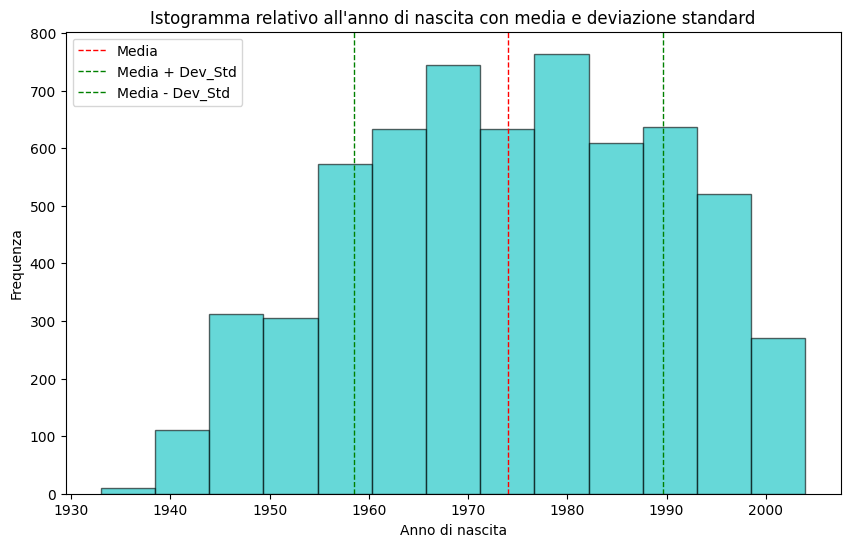

La deviazione standard relativa all'anno di nascita vale: 15.534565341094645


In [25]:
# Seleziono la colonna
anni_nascita = cyclists['birth_year']

# Calcolo della media e della deviazione standard
media = np.mean(anni_nascita)
std_dev = np.std(anni_nascita)

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
plt.hist(anni_nascita, bins=13, alpha=0.6, color='c', edgecolor='black')
# Linea della media
plt.axvline(media, color='r', linestyle='dashed', linewidth=1, label='Media')
# Linee delle deviazioni standard
plt.axvline(media + std_dev, color='g', linestyle='dashed', linewidth=1, label='Media + Dev_Std')
plt.axvline(media - std_dev, color='g', linestyle='dashed', linewidth=1, label='Media - Dev_Std')
# Stampa
plt.title("Istogramma relativo all'anno di nascita con media e deviazione standard")
plt.xlabel('Anno di nascita')
plt.ylabel('Frequenza')
plt.legend(loc='upper left')
plt.show()

# Stampo il valore della deviazione standard
print(f"La deviazione standard relativa all'anno di nascita vale: {std_dev}")

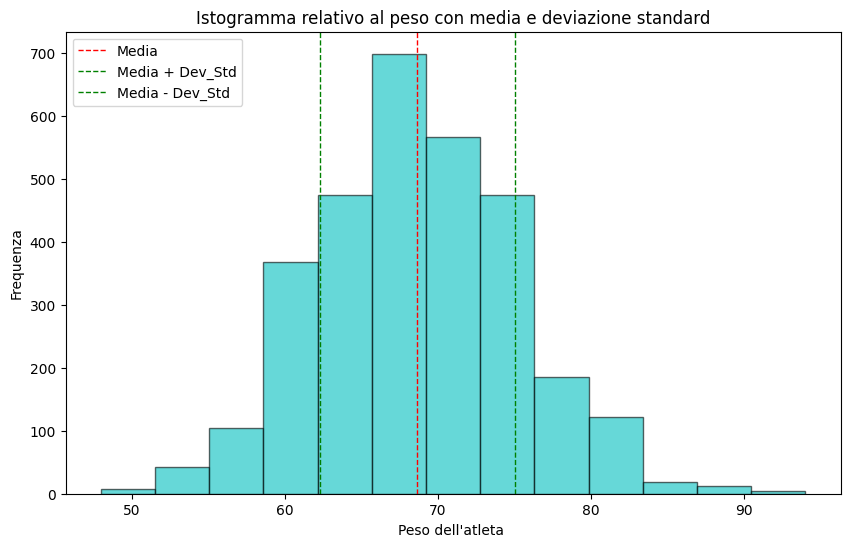

La deviazione standard relativa al peso vale: 6.3471512314873175


In [26]:
# Seleziono la colonna
pesi = cyclists['weight']

# Calcolo della media e della deviazione standard
media = np.mean(pesi)
std_dev = np.std(pesi)

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
plt.hist(pesi, bins=13, alpha=0.6, color='c', edgecolor='black')
# Linea della media
plt.axvline(media, color='r', linestyle='dashed', linewidth=1, label='Media')
# Linee delle deviazioni standard
plt.axvline(media + std_dev, color='g', linestyle='dashed', linewidth=1, label='Media + Dev_Std')
plt.axvline(media - std_dev, color='g', linestyle='dashed', linewidth=1, label='Media - Dev_Std')
# Stampa
plt.title('Istogramma relativo al peso con media e deviazione standard')
plt.xlabel("Peso dell'atleta ")
plt.ylabel('Frequenza')
plt.legend(loc='upper left')
plt.show()

# Stampo il valore della deviazione standard
print(f"La deviazione standard relativa al peso vale: {std_dev}")

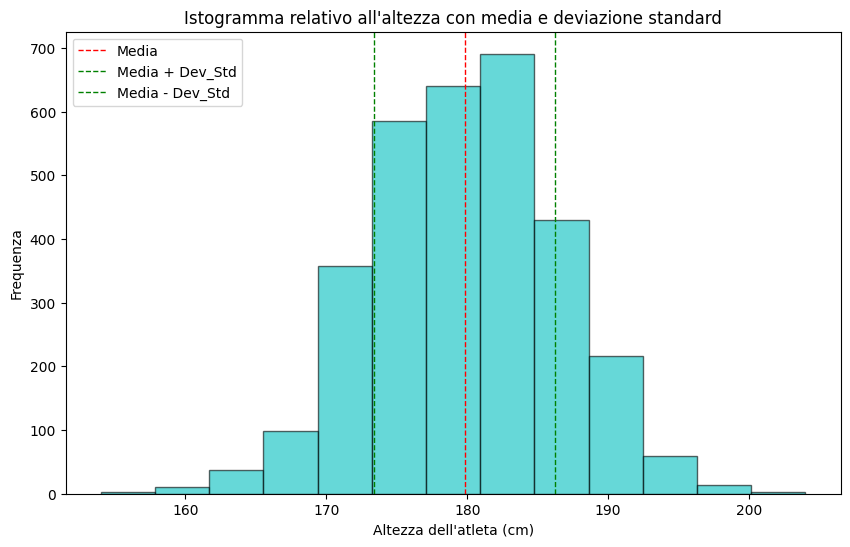

La deviazione standard relativa all'altezza vale: 6.4424222186713855


In [28]:
# Seleziono la colonna
altezze = cyclists['height']

# Calcolo della media e della deviazione standard
media = np.mean(altezze)
std_dev = np.std(altezze)

# Creazione dell'istogramma
plt.figure(figsize=(10, 6))
plt.hist(altezze, bins=13, alpha=0.6, color='c', edgecolor='black')
# Linea della media
plt.axvline(media, color='r', linestyle='dashed', linewidth=1, label='Media')
# Linee delle deviazioni standard
plt.axvline(media + std_dev, color='g', linestyle='dashed', linewidth=1, label='Media + Dev_Std')
plt.axvline(media - std_dev, color='g', linestyle='dashed', linewidth=1, label='Media - Dev_Std')
# Stampa
plt.title("Istogramma relativo all'altezza con media e deviazione standard")
plt.xlabel("Altezza dell'atleta (cm)")
plt.ylabel('Frequenza')
plt.legend(loc='upper left')
plt.show()

# Stampo il valore della deviazione standard
print(f"La deviazione standard relativa all'altezza vale: {std_dev}")

In merito alle deviazioni standard calcolate, possiamo concludere che <b>abbiamo una variazione dei dati più forte nell'anno di nascita</b>. 

### 1.2) Analisi delle distribuzioni (non normalizzate)
Generiamo i grafici delle distribuzioni (non normalizzate).

Vengono riportati due grafici sovrapposti:
<ol>
    <li> <b> Boxenplot: </b> ci permette di osservare la distribuzione, i quartili ed i vari box di valori</li>
    <li> <b> Boxplot (vuoto): </b> ci permette di osservare la distribuzione, i quartili e gli whiskers </li>
</ol>
La marcatura fornita dagli whiskers ci permette di identificare dei possibili <b>outliers</b> all'interno della distribuzione. Gli outliers vengono rappresentati come punti esterni agli whiskers. Seguono:

<Axes: xlabel='birth_year'>

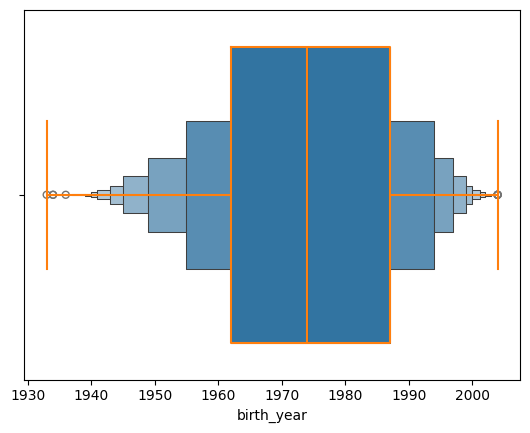

In [41]:
# Boxen plot
sns.boxenplot(cyclists['birth_year'], orient="h")
# Box plot sovrapposto (e vuoto)
sns.boxplot(cyclists['birth_year'], fill=False, orient="h")

<Axes: xlabel='weight'>

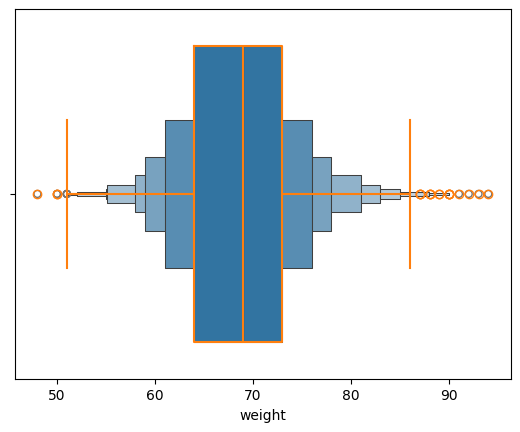

In [42]:
# Boxen plot
sns.boxenplot(cyclists['weight'], orient="h")
# Box plot sovrapposto (e vuoto)
sns.boxplot(cyclists['weight'], fill=False, orient="h")

<Axes: xlabel='height'>

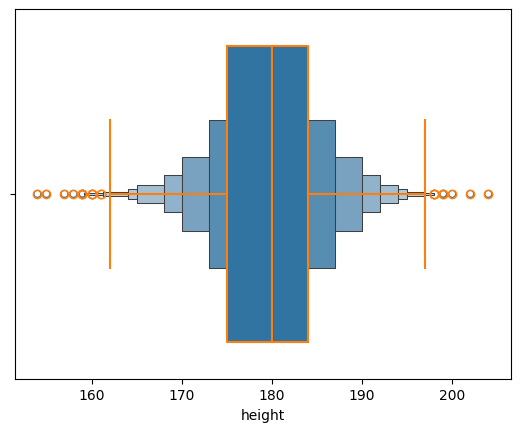

In [43]:
# Boxen plot
sns.boxenplot(cyclists['height'], orient="h")
# Box plot sovrapposto (e vuoto)
sns.boxplot(cyclists['height'], fill=False, orient="h")

Analizzando i grafici, possiamo ipotizzare la presenza di <b>outliers</b> all'interno della distribuzione. 

### 1.3) Valori mancanti
Analizziamo la presenza (o meno) di valori mancanti all'interno del dataset relativo ai ciclisti.

In [45]:
# Conto i valori nulli
cyclists.isnull().sum()

_url              0
name              0
birth_year       13
weight         3056
height         2991
nationality       1
dtype: int64

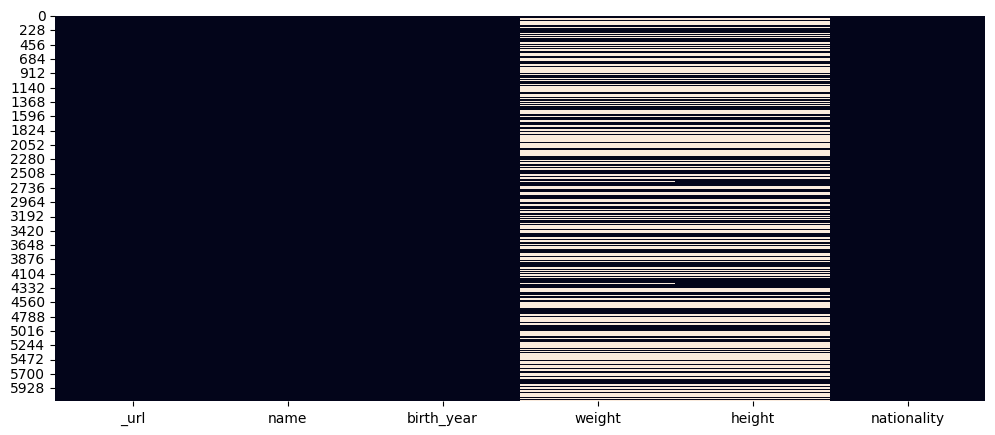

In [46]:
fig, ax = plt.subplots(figsize=(12, 5))
sns.heatmap(cyclists.isnull(), cbar=False, xticklabels=True, ax=ax)
plt.show()

Dal seguente grafico possiamo notare come la maggior parte dei valori mancanti sia sul <b>peso</b> e sull'<b>altezza</b>.